<a href="https://colab.research.google.com/github/sunford4927/Aischool/blob/main/Aischool/machine%20learning/python/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/colab%20Notebooks/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()


(60000, 28, 28) (10000, 28, 28)


In [2]:
import numpy as np
# 새로운 레이블 작성
y_train_odd = []
for y in y_train:
  if y % 2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape


(60000,)

In [3]:
y_train[0],y_train_odd[0]


(5, 1)

In [4]:
# 검증 레이블 작성
y_test_odd = []
for y in y_test:
  if y % 2 == 0:
    y_test_odd.append(0)
  else:
    y_test_odd.append(1)

y_test_odd = np.array(y_train_odd)
y_test_odd.shape


(60000,)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# 채널 추가
x_train_in = tf.expand_dims(x_train,-1)
x_test_in = tf.expand_dims(x_test, -1)
x_train_in.shape, x_test_in.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

In [7]:
# 모델 생성 ( 출력을 2개로 나누기, 2개의 입력을 받는 레이어)
inputs = tf.keras.layers.Input(shape=(28,28,1))
conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)

flat = tf. keras.layers.Flatten()(pool)
flat_inputs = tf.keras.layers.Flatten()(inputs)

concat = tf.keras.layers.Concatenate()([flat,flat_inputs])

outputs = tf.keras.layers.Dense(10, activation= 'softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

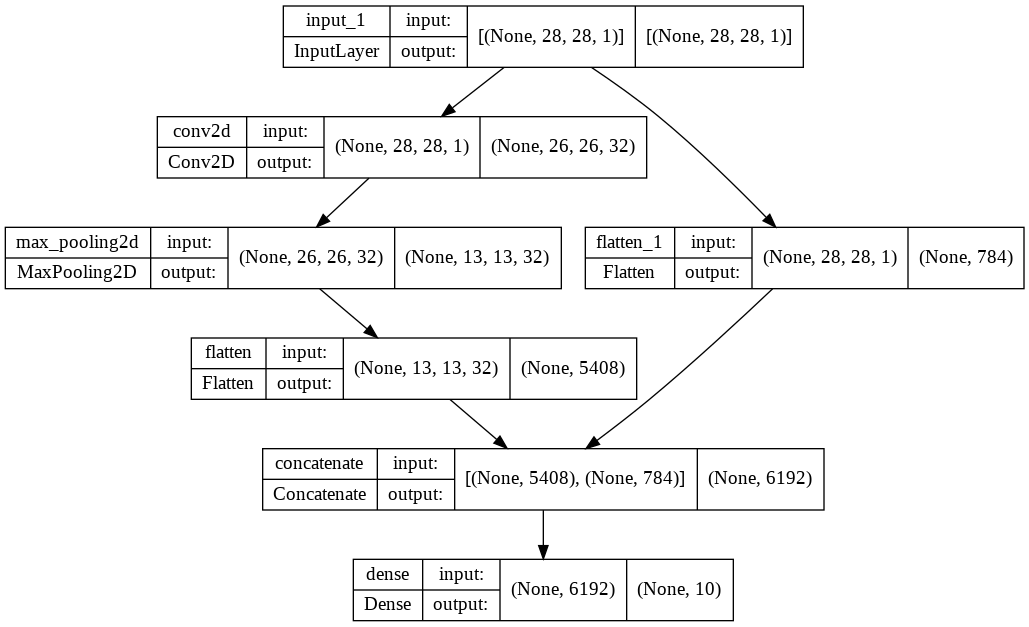

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(x_train_in, y_train,
                    validation_data=(x_test_in, y_test),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2111 - accuracy: 0.9397 - val_loss: 0.0984 - val_accuracy: 0.9711
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0806 - accuracy: 0.9763 - val_loss: 0.0660 - val_accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0610 - accuracy: 0.9818 - val_loss: 0.0576 - val_accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0526 - val_accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0518 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0512 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0561 - val_accurac

In [11]:
val_loss, val_acc = model.evaluate(x_test_in,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9810


In [12]:
# multi-output (출력1: 0-9 숫자예측, 출력2: 홀, 짝 예측)
inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')
conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)

flat = tf. keras.layers.Flatten(name='flatten_layer')(pool)
flat_inputs = tf.keras.layers.Flatten()(inputs)

concat = tf.keras.layers.Concatenate()([flat,flat_inputs])

digit_outputs = tf.keras.layers.Dense(10, activation= 'softmax',name='digit_dense')(concat)
odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid',name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs,odd_outputs])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

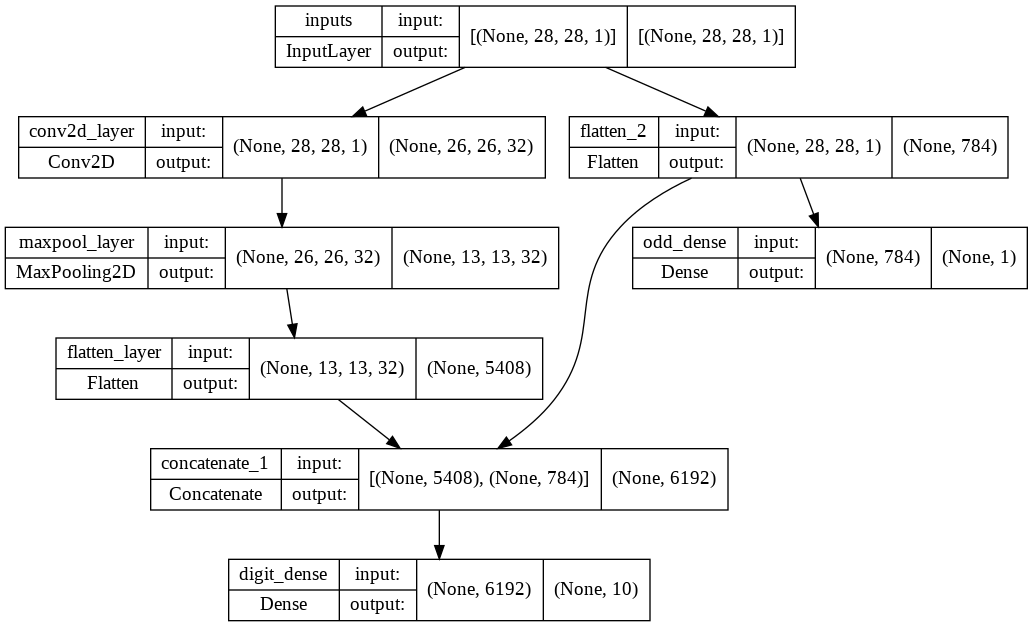

In [13]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn(홀짝).png')

In [14]:
model.compile(optimizer='adam',
              loss = {'digit_dense':'sparse_categorical_crossentropy',
                      'odd_dense' : 'binary_crossentropy'},
              loss_weights={'digit_dense':1,
                            'odd_dense':0.5},
              metrics=['accuracy'])

In [15]:
history = model.fit({'inputs':x_train_in},
                    {'digit_dense' : y_train,
                     'odd_dense' : y_train_odd},
                    validation_data=({'inputs':x_test_in},
                                     {'digit_dense':y_test,'odd_dense':y_test_odd}),
                    epochs =10
                    )

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3683 - digit_dense_loss: 0.2082 - odd_dense_loss: 0.3202 - digit_dense_accuracy: 0.9413 - odd_dense_accuracy: 0.8677

ValueError: ignored

In [21]:
y_train_odd.shape

(60000,)

In [ ]:
model.evaluate({'inputs': x_test_in}, {'digit_'})

In [16]:
import matplotlib.pyplot as plt
def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

In [ ]:
digit_pred,oddpred = model.predict(x_test_in)

In [ ]:
np.argmax(digit_pred[0])

In [ ]:
odd_pred[0]

In [ ]:
# 숫자 분류하는 모델 재구성 (Transfer Leaning)
base_model_output = model.get_layer('flatten_layer').output
base_model = tf.keras.models.Model(inputs=model.input,outputs=base_model_output, name='base')

In [ ]:
digit_model = tf.keras.Sequential([
    base
])

In [ ]:
# 베이스 모델의 가중치를 고정 (Freeze Model)
base_model_frozen = tf.keras.models.Model(inputs=model.input,outputs=base_model_output, name='base-fromzen')
base_model_frozen.trainable = False
base_model_frozen.summary()